# CMB PHYSICS TUTORIAL-1 

## Import modules

In [62]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower

## Define Parameters

In [88]:
#The defaults give one massive neutrino and helium set using BBN consistency
pars = camb.set_params(H0=70, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.15,
                       As=2e-9, ns=0.965, halofit_version='mead', max_l=3000)

## Get Results

In [83]:
results1 = camb.get_results(pars)
powers =results1.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


(2901, 4)


Text(0.5, 1.0, '$EE\\, [\\mu K^2]$')

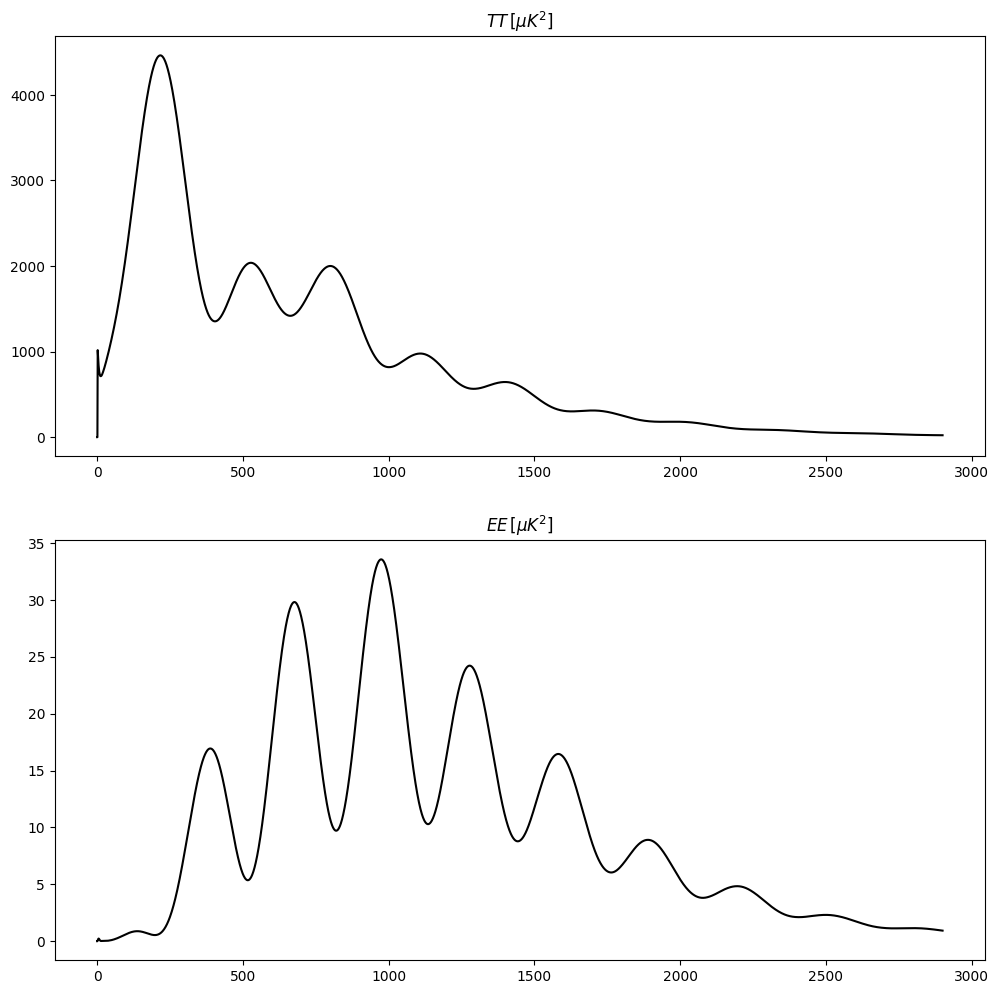

In [84]:
totCL=powers['total']
print(totCL.shape)
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,1, figsize = (12,12))
ax[0].plot(ls,totCL[:,0], color='k')
ax[0].set_title(r'$TT\, [\mu K^2]$')
ax[1].plot(ls,totCL[:,1], color='k')
ax[1].set_title(r'$EE\, [\mu K^2]$')

## Visualize the maps

In [85]:

import healpy as hp
def dl_cl(ell,dl):
    return 2*np.pi*dl/(ell*(ell+1))
nside = 512
ell = np.arange(1,3*nside+1)
newcl = []
newcl2 = []
for j in range(4):
    newcl.append(dl_cl(ell,totCL[:3*nside,j]))


In [74]:
np.random.seed(12)
map1 = hp.synfast(newcl,nside = nside)

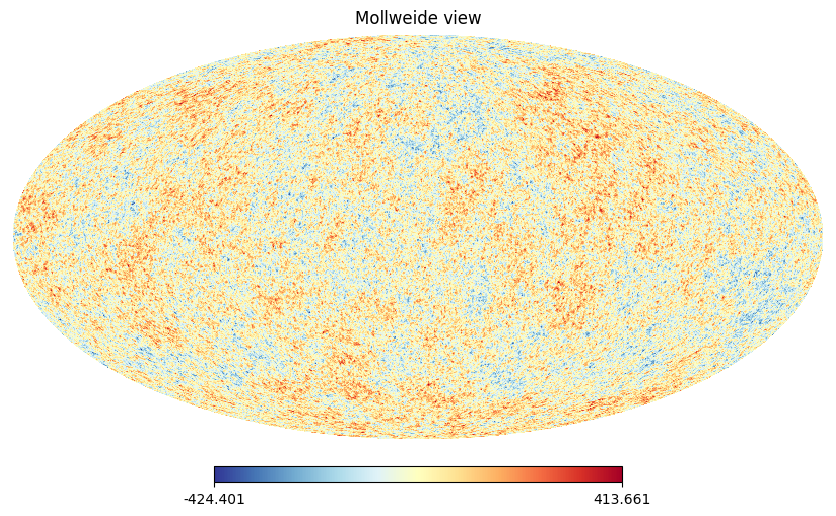

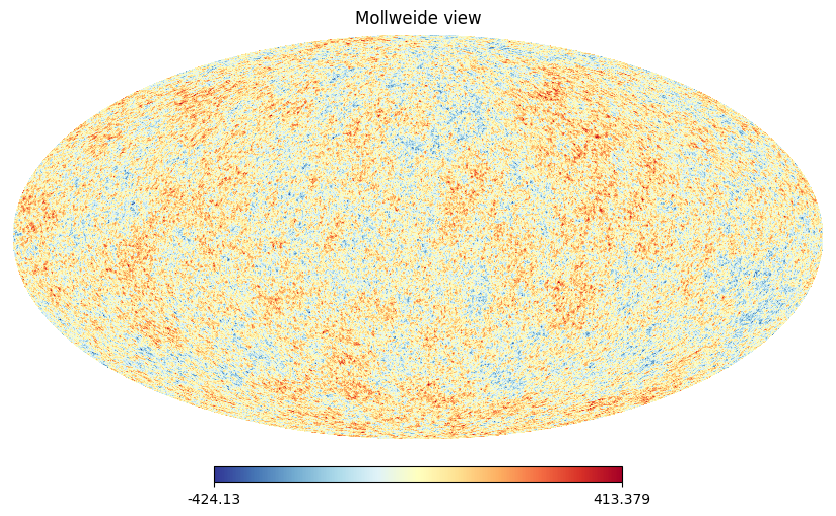

In [87]:
hp.mollview(map1[0],rot=(0,0,),cmap = "RdYlBu_r")
hp.mollview(map2[0],rot=(0,0,),cmap = "RdYlBu_r")

## If there is no dark matter in the universe, the CMB power spectrum changes. Plot the CMB power spectrums for this case and also compare the maps with same random seeds.